In [1]:
import numpy as np                      
import pandas as pd            
import seaborn as sns          
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings     
filterwarnings("ignore")

In [3]:
df = pd.read_excel("Sales_Data.xlsx")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.shape

(2747, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [8]:
df = df.drop(['DAYS_SINCE_LASTORDER','PHONE','ADDRESSLINE1','POSTALCODE'], axis=1)

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [10]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,214.000000


In [11]:
df.describe(include="all")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747,2747,2747.000000,2747,2747,2747,2747,2747,2747,2747
unique,NaN,NaN,NaN,NaN,NaN,246,6,7,NaN,109,89,71,19,76,72,3
top,NaN,NaN,NaN,NaN,NaN,2018-11-14 00:00:00,Shipped,Classic Cars,NaN,S18_3232,Euro Shopping Channel,Madrid,USA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2541,949,NaN,51,259,304,928,259,259,1349
first,NaN,NaN,NaN,NaN,NaN,2018-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,NaN,NaN,NaN,100.691664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,91.877521,9.762135,42.042548,4.230544,1838.953901,NaN,NaN,NaN,40.114802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Hirano,Juri,Medium


In [13]:
df1 = df.copy()

In [14]:
df1 = df1.drop(['ORDERDATE'], axis=1)

In [15]:
cat = []
nums = []

for i in df1.columns:
    if df1[i].dtype == 'O':
        cat.append(i)
    else:
        nums.append(i)

In [16]:
df_cat = df[cat]
#df_cat

In [17]:
df_num = df[nums]
#df_num

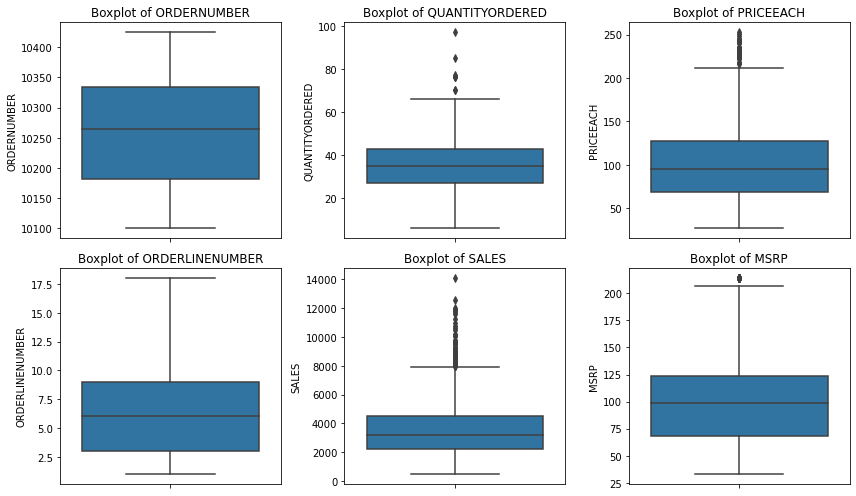

In [18]:
plt.figure(figsize=(12,7))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

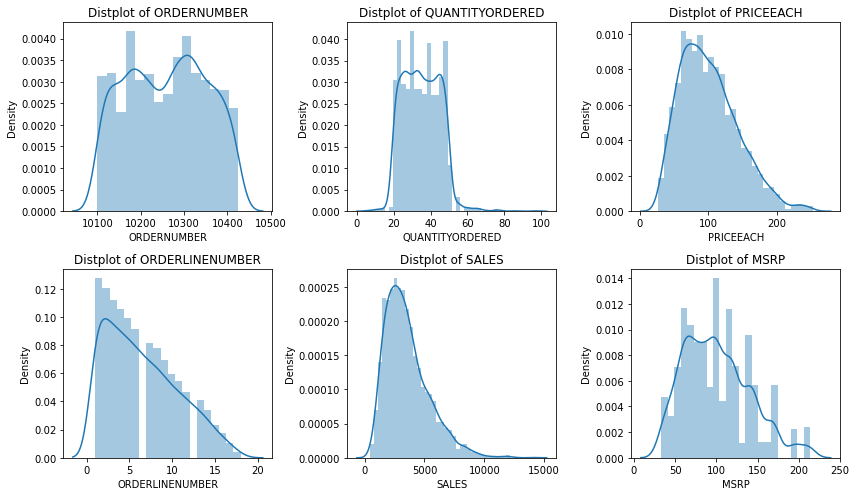

In [19]:
plt.figure(figsize=(12,7))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(2, 3, i + 1)
    sns.distplot(df_num[df_num.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [20]:
df_num.skew(axis = 0)

ORDERNUMBER       -0.006995
QUANTITYORDERED    0.369286
PRICEEACH          0.697222
ORDERLINENUMBER    0.575327
SALES              1.155940
MSRP               0.575646
dtype: float64

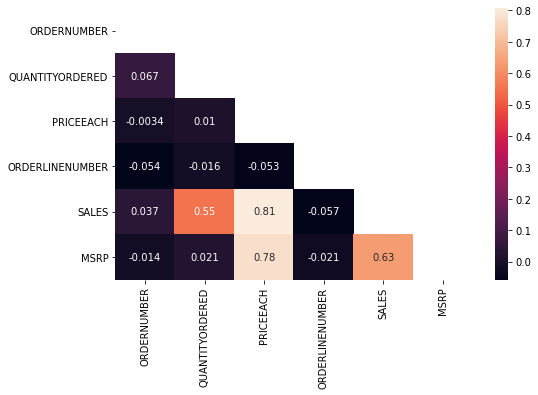

In [21]:
plt.figure(figsize=(8,5));
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask);